In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
# Total de Filmes e colunas do arquivo

df = pd.read_excel('A3_IA_Excel.xlsx')

print(f"Dataset: {df.shape[0]} filmes, {df.shape[1]} colunas")
print(f"Colunas: {df.columns.tolist()}")

Dataset: 8655 filmes, 8 colunas
Colunas: ['ID', 'Title', 'Year', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']


In [3]:
netflix = df[df['Netflix'] == 1]
hulu = df[df['Hulu'] == 1]
prime = df[df['Prime Video'] == 1]
disney = df[df['Disney+'] == 1]

plataformas = ["Netflix", "Hulu", "Prime Video", "Disney+"]
dados_plataformas = [netflix, hulu, prime, disney]

for plataforma, dados in zip(plataformas, dados_plataformas):
    print(f"{plataforma}: {len(dados)} filmes")

Netflix: 3658 filmes
Hulu: 1020 filmes
Prime Video: 3491 filmes
Disney+: 733 filmes


In [ ]:
# Média de Notas - Valores em Percentual

media_netflix = netflix['Rotten Tomatoes'].mean()
media_hulu = hulu['Rotten Tomatoes'].mean()
media_prime = prime['Rotten Tomatoes'].mean()
media_disney = disney['Rotten Tomatoes'].mean()

medias = [media_netflix, media_hulu, media_prime, media_disney]

print("🏆 RANKING POR MÉDIA:")
ranking = pd.DataFrame({'Plataforma': plataformas, 'Média': medias}).sort_values('Média', ascending=False)
for i, (_, row) in enumerate(ranking.iterrows(), 1):
    print(f"{i}º {row['Plataforma']}: {row['Média']:.1f}%")

🏆 RANKING POR MÉDIA:
1º Hulu: 60.3%
2º Disney+: 59.5%
3º Netflix: 54.4%
4º Prime Video: 50.7%


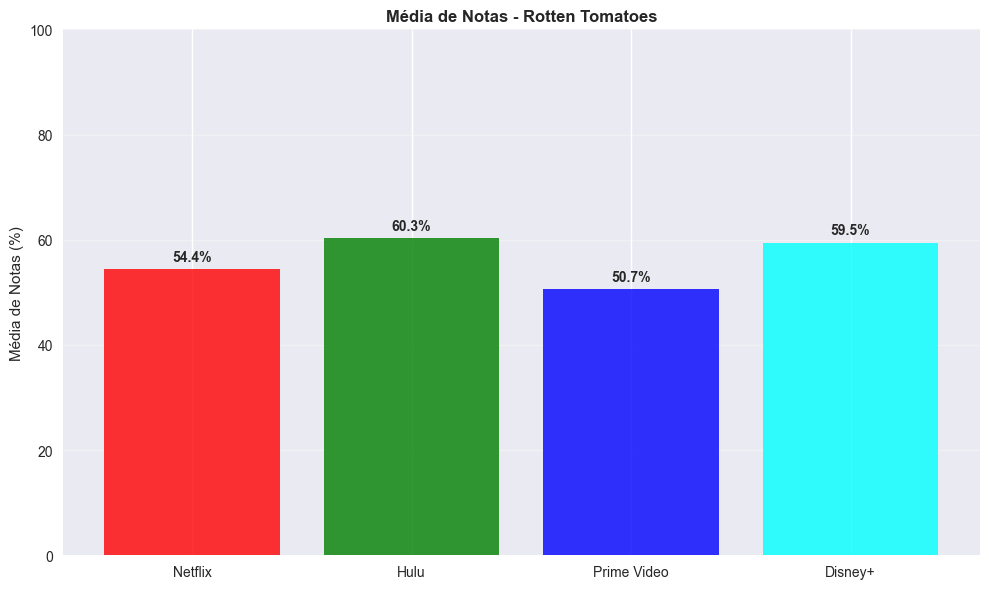

In [ ]:
# Médias de Notas - Gráfico

plt.figure(figsize=(10, 6))
bars = plt.bar(plataformas, medias, color=['red', 'green', 'blue', 'cyan'], alpha=0.8)

plt.ylabel("Média de Notas (%)")
plt.title("Média de Notas - Rotten Tomatoes", fontweight='bold')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

for bar, media in zip(bars, medias):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{media:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Quantidade de Filmes - Valores

numero_filmes = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
numeros = [numero_filmes['Netflix'], numero_filmes['Hulu'], 
           numero_filmes['Prime Video'], numero_filmes['Disney+']]

print("🏆 RANKING POR QUANTIDADE:")
ranking_qtd = pd.DataFrame({'Plataforma': plataformas, 'Quantidade': numeros}).sort_values('Quantidade', ascending=False)
for i, (_, row) in enumerate(ranking_qtd.iterrows(), 1):
    print(f"{i}º {row['Plataforma']}: {row['Quantidade']} filmes")

🏆 RANKING POR QUANTIDADE:
1º Netflix: 3658 filmes
2º Prime Video: 3491 filmes
3º Hulu: 1020 filmes
4º Disney+: 733 filmes


## 📈 GRÁFICO 2: Quantidade de Filmes

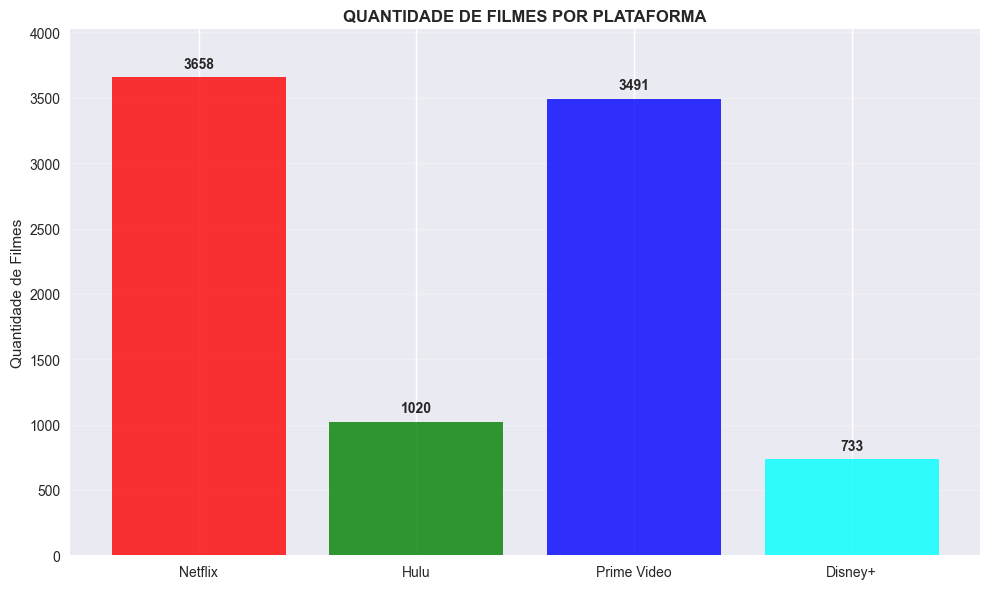

In [ ]:
# Quantidade de Filmes - Gráfico

plt.figure(figsize=(10, 6))
bars = plt.bar(plataformas, numeros, color=['red', 'green', 'blue', 'cyan'], alpha=0.8)

plt.ylabel('Quantidade de Filmes')
plt.title('QUANTIDADE DE FILMES POR PLATAFORMA', fontweight='bold')
plt.ylim(0, max(numeros) * 1.1)
plt.grid(axis='y', alpha=0.3)

for bar, num in zip(bars, numeros):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, f'{int(num)}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [9]:
# Exclusividade de Conteúdo

df['Filmes Compartilhados'] = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)
uma_plataforma = df[df['Filmes Compartilhados'] == 1].shape[0]
mais_de_uma_plataforma = df[df['Filmes Compartilhados'] > 1].shape[0]

dados_exclusividade = [uma_plataforma, mais_de_uma_plataforma]
labels_exclusividade = ['Uma Plataforma', 'Mais de Uma Plataforma']

print(f"Exclusividade: {uma_plataforma/len(df)*100:.1f}% em apenas UMA plataforma")

Exclusividade: 97.3% em apenas UMA plataforma


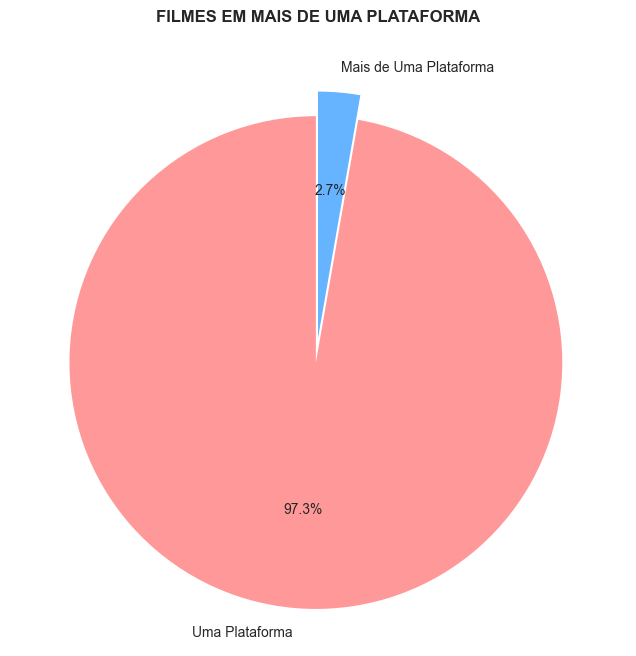

In [11]:
# Exclusividade 

plt.figure(figsize=(8, 8))
colors_exclusividade = ['#ff9999', '#66b3ff']
plt.pie(dados_exclusividade, labels=labels_exclusividade, autopct='%1.1f%%', 
        startangle=90, colors=colors_exclusividade, explode=(0.1, 0))
plt.title('FILMES EM MAIS DE UMA PLATAFORMA', fontweight='bold')
plt.show()

In [13]:
# Distribuição por Nota

def analisar_distribuicao(plataforma_nome, plataforma_data):
    certified = plataforma_data[plataforma_data['Rotten Tomatoes'] > 70].shape[0]
    fresh = plataforma_data[(plataforma_data['Rotten Tomatoes'] >= 60) & (plataforma_data['Rotten Tomatoes'] <= 70)].shape[0]
    rotten = plataforma_data[plataforma_data['Rotten Tomatoes'] < 60].shape[0]
    
    total = certified + fresh + rotten
    return certified, fresh, rotten, total

print("Distribuição por Categoria de Nota:")
for plataforma, dados in zip(plataformas, dados_plataformas):
    certified, fresh, rotten, total = analisar_distribuicao(plataforma, dados)
    print(f"\n{plataforma}:")
    print(f"  🏆 Acima de 70: {certified} ({certified/total*100:.1f}%)")
    print(f"  👍 60-70: {fresh} ({fresh/total*100:.1f}%)")
    print(f"  👎 Abaixo de 59: {rotten} ({rotten/total*100:.1f}%)")

Distribuição por Categoria de Nota:

Netflix:
  🏆 Acima de 70: 489 (13.4%)
  👍 60-70: 727 (19.9%)
  👎 Abaixo de 59: 2435 (66.7%)

Hulu:
  🏆 Acima de 70: 209 (20.5%)
  👍 60-70: 322 (31.6%)
  👎 Abaixo de 59: 489 (47.9%)

Prime Video:
  🏆 Acima de 70: 207 (5.9%)
  👍 60-70: 543 (15.6%)
  👎 Abaixo de 59: 2741 (78.5%)

Disney+:
  🏆 Acima de 70: 168 (22.9%)
  👍 60-70: 199 (27.1%)
  👎 Abaixo de 59: 366 (49.9%)


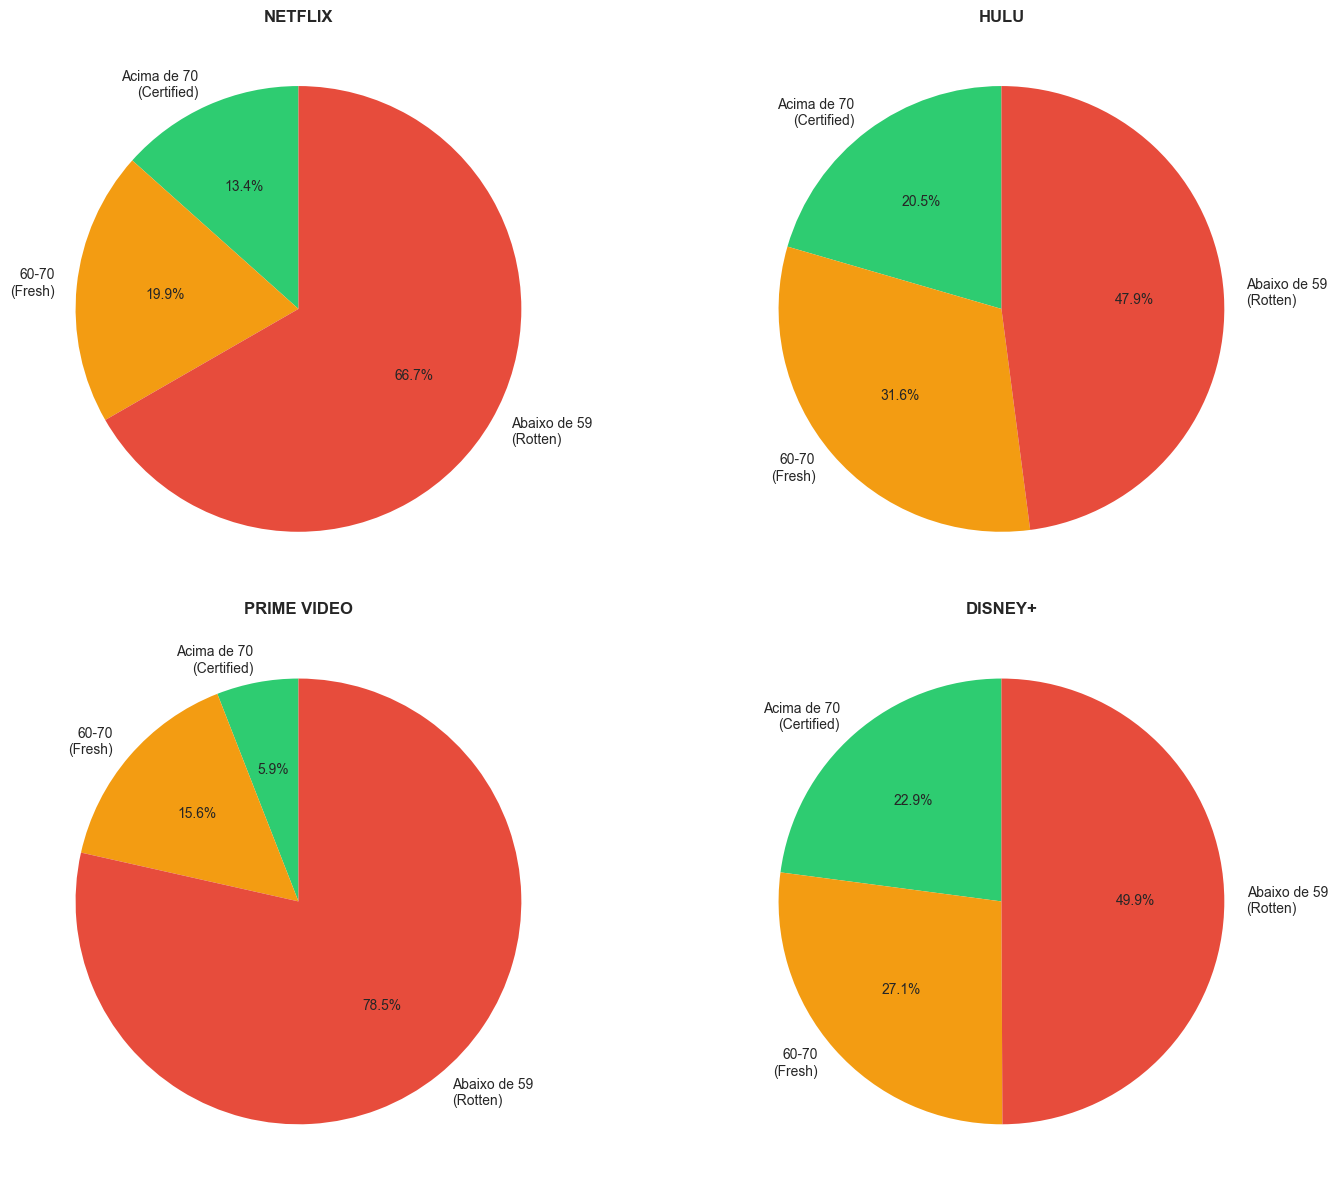

In [14]:
# Distribuição por Plataforma

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

cores_categorias = ['#2ecc71', '#f39c12', '#e74c3c']
labels_categorias = ['Acima de 70\n(Certified)', '60-70\n(Fresh)', 'Abaixo de 59\n(Rotten)']

for i, (plataforma, dados) in enumerate(zip(plataformas, dados_plataformas)):
    certified, fresh, rotten, total = analisar_distribuicao(plataforma, dados)
    
    sizes = [certified, fresh, rotten]
    axes[i].pie(sizes, labels=labels_categorias, autopct='%1.1f%%', 
                startangle=90, colors=cores_categorias)
    axes[i].set_title(f'{plataforma.upper()}', fontweight='bold')

plt.tight_layout()
plt.show()

In [15]:
# Conclusão e Recomendações
print("=" * 50)
print("🎯 RESUMO EXECUTIVO")
print("=" * 50)

print(f"\n🏆 Melhor média: {ranking.iloc[0]['Plataforma']} ({ranking.iloc[0]['Média']:.1f}%)")
print(f"📀 Maior catálogo: {ranking_qtd.iloc[0]['Plataforma']} ({ranking_qtd.iloc[0]['Quantidade']} filmes)")
print(f"📊 Exclusividade: {uma_plataforma/len(df)*100:.1f}% em UMA plataforma")

print("\n💡 RECOMENDAÇÕES:")
print("• Hulu: Melhor para qualidade crítica")
print("• Netflix: Ideal para variedade")
print("• Disney+: Conteúdo balanceado")
print("• Prime Video: Complementar")

print("\n" + "=" * 50)
print("Cada plataforma atende diferentes necessidades de usuários.")
print("=" * 50)

🎯 RESUMO EXECUTIVO

🏆 Melhor média: Hulu (60.3%)
📀 Maior catálogo: Netflix (3658 filmes)
📊 Exclusividade: 97.3% em UMA plataforma

💡 RECOMENDAÇÕES:
• Hulu: Melhor para qualidade crítica
• Netflix: Ideal para variedade
• Disney+: Conteúdo balanceado
• Prime Video: Complementar

Cada plataforma atende diferentes necessidades de usuários.
